In [1]:
import os 
import pickle
import numpy as np
import pandas as pd 
from glob import glob 
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import mahalanobis

import seaborn as sns

In [2]:
def dtw_distance(x, y, dist='euclidean'):
    m, n = len(x), len(y)
    dtw = np.zeros((m+1, n+1))
    
    # Initialize the first row and column of the DTW matrix
    for i in range(1, m+1):
        dtw[i, 0] = float('inf')
    for j in range(1, n+1):
        dtw[0, j] = float('inf')
    dtw[0, 0] = 0
    
    # Compute the DTW matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            if dist == 'euclidean':
              cost = euclidean_distance(x[i-1], y[j-1])  # Distance measure between elements x[i-1] and y[j-1]
            if dist == 'mahalanobis':
              cost = mahalanobis_distance(x[i-1], y[j-1])
            dtw[i, j] = cost + min(dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1])
    
    return dtw[m, n]

def euclidean_distance(a, b):
    # Calculate the distance between two elements a and b
    # Modify this function to use an appropriate distance measure for your multivariate time series
    
    # For example, Euclidean distance can be used as follows:
    return np.linalg.norm(a - b)
    
    # Alternatively, you can use other distance measures like Manhattan distance or cosine similarity
    # pass

def mahalanobis_distance(a, b):
    # Calculate the Mahalanobis distance between two elements a and b
    # cov is the covariance matrix
    # cov = np.array([[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],])
    
    cov = np.array([[1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,]])
    # Calculate the Mahalanobis distance using the scipy.spatial.distance.mahalanobis function
    return mahalanobis(a, b, cov)




---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_root = '/content/drive/MyDrive/22_FYP42 - Zero-shot Explainable HAR/epoch_vids/CKIM/UTD-MHAD/'

In [5]:
with open(f"{data_root}skeleton_label_predictions.pickle", 'rb') as handle:
    pred_skeleton_data = pickle.load(handle)

In [6]:
with open(f"{data_root}skeleton_original_seq.pickle", 'rb') as handle:
    origin_skeleton_data = pickle.load(handle)

In [7]:
_, _, files = next(os.walk(f"{data_root}/videos"))

In [8]:
pred_files, target_files = {}, {}
for f in files:
  id = int(f.split('_')[1])
  if f[-17:] == 'original_skel.mp4':
    target_files[id] = f
  else:
    pred_files[id] = f.split('_m_')[1].split('_')[0]


---

In [9]:
pred_df = pd.DataFrame().from_records(pred_skeleton_data['label'])
pred_df.head()

,id,target,prediction
0,0,tennis swing,throw
1,1,tennis swing,draw circle(counter clockwise)
2,2,throw,draw circle(counter clockwise)
3,3,throw,draw circle(counter clockwise)
4,4,lunge,throw


In [10]:
# pred_df['matching'] = pred_df['id'].map(pred_files)
# pred_df.head()

---

In [11]:
# UTD-MHAD
super_dict = {
    'One-hand activities': ['swipe left', 'swipe right', 'wave', 'throw', 'knock', 'catch'],
    'Two-hand activities': ['clap', 'arm cross', 'arm curl', 'push'],
    'Drawing activities': ['draw x', 'draw circle(clockwise)', 'draw circle(counter clockwise)', 'draw triangle'],
    'Sports': ['basketball shoot', 'boxing', 'baseball swing', 'tennis serve', 'tennis swing'],
    'Activities involving legs': ['bowling', 'pickup & throw', 'jog', 'walk', 'sit to stand', 'stand to sit', 'lunge', 'squat']
}


---

In [12]:
super_class = {}
for i,j in super_dict.items():
    for c in j:
        super_class[c] = i 

In [13]:
super_class

{'swipe left': 'One-hand activities',
 'swipe right': 'One-hand activities',
 'wave': 'One-hand activities',
 'throw': 'One-hand activities',
 'knock': 'One-hand activities',
 'catch': 'One-hand activities',
 'clap': 'Two-hand activities',
 'arm cross': 'Two-hand activities',
 'arm curl': 'Two-hand activities',
 'push': 'Two-hand activities',
 'draw x': 'Drawing activities',
 'draw circle(clockwise)': 'Drawing activities',
 'draw circle(counter clockwise)': 'Drawing activities',
 'draw triangle': 'Drawing activities',
 'basketball shoot': 'Sports',
 'boxing': 'Sports',
 'baseball swing': 'Sports',
 'tennis serve': 'Sports',
 'tennis swing': 'Sports',
 'bowling': 'Activities involving legs',
 'pickup & throw': 'Activities involving legs',
 'jog': 'Activities involving legs',
 'walk': 'Activities involving legs',
 'sit to stand': 'Activities involving legs',
 'stand to sit': 'Activities involving legs',
 'lunge': 'Activities involving legs',
 'squat': 'Activities involving legs'}

---

In [14]:
def match_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = cs[np.argmin(np.array(dists))]
  return matching_class

In [15]:
pred_df['matching'] = pred_df.apply(lambda r: match_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching
0,0,tennis swing,throw,jog
1,1,tennis swing,draw circle(counter clockwise),draw triangle
2,2,throw,draw circle(counter clockwise),tennis serve
3,3,throw,draw circle(counter clockwise),draw triangle
4,4,lunge,throw,squat


In [16]:
def score_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = np.min(np.array(dists))
  return matching_class

In [17]:
pred_df['matching_dtw_dist'] = pred_df.apply(lambda r: score_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist
0,0,tennis swing,throw,jog,5.747893
1,1,tennis swing,draw circle(counter clockwise),draw triangle,7.736411
2,2,throw,draw circle(counter clockwise),tennis serve,7.508506
3,3,throw,draw circle(counter clockwise),draw triangle,7.248520
4,4,lunge,throw,squat,6.380257


---

In [18]:
pred_df['super_target'] = pred_df['target'].map(super_class)
pred_df['super_prediction'] = pred_df['prediction'].map(super_class)
pred_df['super_matching'] = pred_df['matching'].map(super_class)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching
0,0,tennis swing,throw,jog,5.747893,Sports,One-hand activities,Activities involving legs
1,1,tennis swing,draw circle(counter clockwise),draw triangle,7.736411,Sports,Drawing activities,Drawing activities
2,2,throw,draw circle(counter clockwise),tennis serve,7.508506,One-hand activities,Drawing activities,Sports
3,3,throw,draw circle(counter clockwise),draw triangle,7.248520,One-hand activities,Drawing activities,Drawing activities
4,4,lunge,throw,squat,6.380257,Activities involving legs,One-hand activities,Activities involving legs


In [19]:
pred_df['correct'] = (pred_df['target'] == pred_df['prediction']).astype(int)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct
0,0,tennis swing,throw,jog,5.747893,Sports,One-hand activities,Activities involving legs,0
1,1,tennis swing,draw circle(counter clockwise),draw triangle,7.736411,Sports,Drawing activities,Drawing activities,0
2,2,throw,draw circle(counter clockwise),tennis serve,7.508506,One-hand activities,Drawing activities,Sports,0
3,3,throw,draw circle(counter clockwise),draw triangle,7.248520,One-hand activities,Drawing activities,Drawing activities,0
4,4,lunge,throw,squat,6.380257,Activities involving legs,One-hand activities,Activities involving legs,0


In [20]:
# super class accuracy 
correct_df = pred_df.loc[pred_df['correct'] == 1, :]
print(accuracy_score(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching']))
print(classification_report(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching'], zero_division=0))

0.5714285714285714
                           precision    recall  f1-score   support

Activities involving legs       0.67      1.00      0.80         6
       Drawing activities       1.00      0.53      0.69        17
      One-hand activities       0.11      0.50      0.18         2
                   Sports       0.00      0.00      0.00         3
      Two-hand activities       0.00      0.00      0.00         0

                 accuracy                           0.57        28
                macro avg       0.36      0.41      0.33        28
             weighted avg       0.76      0.57      0.60        28



In [21]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.17142857142857143
                           precision    recall  f1-score   support

Activities involving legs       0.06      1.00      0.11         1
       Drawing activities       0.75      0.18      0.29        17
      One-hand activities       1.00      0.29      0.44         7
                   Sports       0.00      0.00      0.00        10
      Two-hand activities       0.00      0.00      0.00         0

                 accuracy                           0.17        35
                macro avg       0.36      0.29      0.17        35
             weighted avg       0.57      0.17      0.23        35



In [22]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.3142857142857143
                           precision    recall  f1-score   support

Activities involving legs       0.65      1.00      0.79        11
       Drawing activities       0.00      0.00      0.00         0
      One-hand activities       0.00      0.00      0.00        12
                   Sports       0.00      0.00      0.00        12
      Two-hand activities       0.00      0.00      0.00         0

                 accuracy                           0.31        35
                macro avg       0.13      0.20      0.16        35
             weighted avg       0.20      0.31      0.25        35



In [23]:
# overall interpretability 
print(accuracy_score(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1]))
print(classification_report(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1], zero_division=0))

0.3492063492063492
                           precision    recall  f1-score   support

Activities involving legs       0.26      1.00      0.41         7
       Drawing activities       0.92      0.35      0.51        34
      One-hand activities       0.27      0.38      0.32         8
                   Sports       0.00      0.00      0.00        14
      Two-hand activities       0.00      0.00      0.00         0

                 accuracy                           0.35        63
                macro avg       0.29      0.35      0.25        63
             weighted avg       0.56      0.35      0.36        63



In [24]:
# overall interpretability 
print(accuracy_score(y_true=pred_df['super_target'][:-1], y_pred=pred_df['super_matching'][:-1]))
print(classification_report(y_true=pred_df['super_target'][:-1], y_pred=pred_df['super_matching'][:-1], zero_division=0))

0.4444444444444444
                           precision    recall  f1-score   support

Activities involving legs       0.67      1.00      0.80        18
       Drawing activities       0.69      0.53      0.60        17
      One-hand activities       0.09      0.08      0.08        13
                   Sports       0.00      0.00      0.00        15
      Two-hand activities       0.00      0.00      0.00         0

                 accuracy                           0.44        63
                macro avg       0.29      0.32      0.30        63
             weighted avg       0.40      0.44      0.41        63



---

In [ ]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i])

In [ ]:
pred_df['dtw_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance
0,0,standing,standing,sitting,Static activities,Static activities,Static activities,1,2.748912
1,1,standing,house cleaning,ironing,Static activities,House chores,House chores,0,3.841447
2,2,watching TV,standing,computer work,Sitting activities,Static activities,Sitting activities,0,3.011371
3,3,watching TV,standing,sitting,Sitting activities,Static activities,Static activities,0,2.177320
4,4,standing,ascending stairs,walking,Static activities,Walking activities,Walking activities,0,2.700568


In [ ]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i], dist='mahalanobis')

pred_df['mahalanobis_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance,mahalanobis_distance
0,0,standing,standing,sitting,Static activities,Static activities,Static activities,1,2.748912,3.327028
1,1,standing,house cleaning,ironing,Static activities,House chores,House chores,0,3.841447,5.001660
2,2,watching TV,standing,computer work,Sitting activities,Static activities,Sitting activities,0,3.011371,4.304220
3,3,watching TV,standing,sitting,Sitting activities,Static activities,Static activities,0,2.177320,2.601304
4,4,standing,ascending stairs,walking,Static activities,Walking activities,Walking activities,0,2.700568,4.998299


In [ ]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].mean()

(5.776188671163782, 7.387471456462266)

In [ ]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].std()

(8.024296060314104, 9.96583172858763)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].mean(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].mean()

(5.9411763212383875, 7.971688616097917)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].std(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].std()

(8.405297595964745, 10.603110541105437)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance,mahalanobis_distance
0,0,sitting,sitting,standing,Static activities,Static activities,Static activities,1,4.856343,5.874290
1,1,sitting,sitting,lying,Static activities,Static activities,Static activities,1,2.770447,3.581169
2,2,descending stairs,descending stairs,ascending stairs,Walking activities,Walking activities,Walking activities,1,14.144512,12.934602
3,3,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.386879,1.900520
4,4,vacuuming,vacuuming,sweeping,House chores,House chores,House chores,1,3.781710,4.761621
...,...,...,...,...,...,...,...,...,...,...
58,58,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.336230,1.772452
59,59,descending stairs,descending stairs,ascending stairs,Walking activities,Walking activities,Walking activities,1,16.067393,25.787864
60,60,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.270577,1.651606
61,61,vacuuming,vacuuming,sweeping,House chores,House chores,House chores,1,3.806480,4.683501


---

In [25]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def discrete_frechet_distance(P, Q):
    n = len(P)
    m = len(Q)
    
    # Create a memoization table to store computed distances
    memo = np.full((n, m), -1.0)
    
    def _dfs(i, j):
        if memo[i, j] > -1.0:
            return memo[i, j]
        
        result = 0.0
        
        if i == 0 and j == 0:
            result = euclidean_distance(P[0], Q[0])
        elif i > 0 and j == 0:
            result = max(_dfs(i - 1, 0), euclidean_distance(P[i], Q[0]))
        elif i == 0 and j > 0:
            result = max(_dfs(0, j - 1), euclidean_distance(P[0], Q[j]))
        elif i > 0 and j > 0:
            result = max(
                min(
                    _dfs(i - 1, j),
                    _dfs(i - 1, j - 1),
                    _dfs(i, j - 1)
                ),
                euclidean_distance(P[i], Q[j])
            )
        
        memo[i, j] = result
        return result
    
    return _dfs(n - 1, m - 1)


In [27]:
def skeleton_dfd(skel1, skel2):
  rsh_skel1 = skel1.reshape((60,12,2))
  rsh_skel2 = skel2.reshape((60,12,2))

  total_dist = 0.0
  for j in range(12):
    total_dist += discrete_frechet_distance(rsh_skel1[:,j,:], rsh_skel2[:,j,:])

  return total_dist

In [28]:
def fretch_func(r):
  i = r['id']
  match_class = r['matching']
  i_skel = pred_skeleton_data['data'][i]
  match_skel = origin_skeleton_data[match_class]
  dist = skeleton_dfd(i_skel, match_skel)
  return dist

In [29]:
pred_df['dfd_dist'] = pred_df.apply(lambda r: fretch_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dfd_dist
0,0,tennis swing,throw,jog,5.747893,Sports,One-hand activities,Activities involving legs,0,0.468090
1,1,tennis swing,draw circle(counter clockwise),draw triangle,7.736411,Sports,Drawing activities,Drawing activities,0,0.513024
2,2,throw,draw circle(counter clockwise),tennis serve,7.508506,One-hand activities,Drawing activities,Sports,0,0.539183
3,3,throw,draw circle(counter clockwise),draw triangle,7.248520,One-hand activities,Drawing activities,Drawing activities,0,0.473104
4,4,lunge,throw,squat,6.380257,Activities involving legs,One-hand activities,Activities involving legs,0,0.643802


In [30]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].mean()

(7.506806036220324, 0.612039400346223)

In [31]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].std()

(1.298443591610196, 0.161146006909126)

In [32]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].mean()

(7.583269694981465, 0.5990097697997838)

In [33]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].std()

(1.327337654631133, 0.21902193492056116)

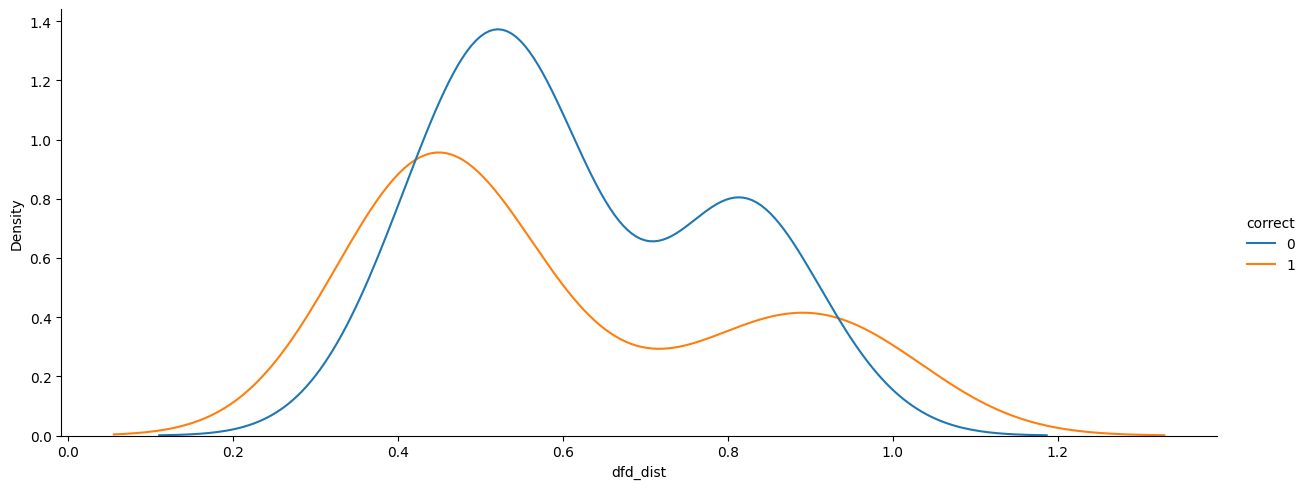

In [34]:
sns_plot = sns.displot(data=pred_df, x="dfd_dist", hue="correct", color='blue', kind="kde", legend=True, height=5, aspect=2.5)